In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

## 1 Brownian motion 11pt

1. (2pt) By using the rescaled random walk, build a program which give one path of a Brownian motion on [0, 1] with a time subdivision t_i = \frac{i}{N} , 0 <= i <= N and give an example of the value taken by W1;

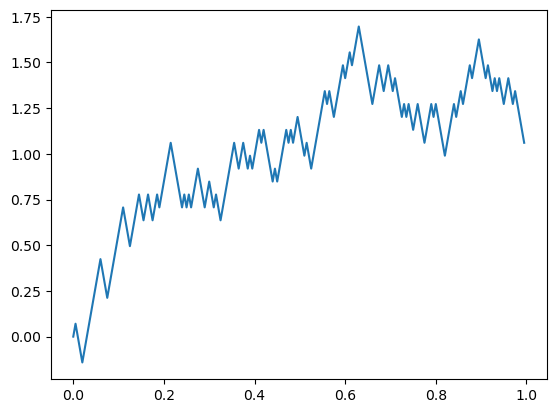

In [2]:
N = 200
np.random.seed(12345)

def walk(N):
    walks = np.random.rand(N)>0.5
    W = np.zeros(N+1)
    for i in range(len(walks)):
        # +1 if the value is > 0.5 else -1
        if walks[i]: W[i+1] = W[i] + 1
        else: W[i+1] = W[i] - 1
    # scale the term
    W = W/np.sqrt(N)
    x_axis = np.arange(0, 1, 1/200)
    np.append(x_axis, 1)
    return x_axis, W

x_axis, W = walk(N)
plt.plot(x_axis, W[:-1])

In [3]:
W[-1]

1.131370849898476

2. (3pt) Generate M path of a Brownian motion and prove numerically that E[Wt] = 0
and Var(Wt) = t for different values of t.

In [4]:
N = 200
M = 20000
np.random.seed(12345)

walks = []
for i in range(M):
    # generate simple random walk
    _, cur_W = walk(N)
    walks.append(cur_W[:-1])

walks = np.array(walks)

In [5]:
# value of E[Wt] at random indices
# very close to 0
np.mean(walks[:, [i for i in range(0, 201, 6)]], axis=0)

array([ 0.00000000e+00, -9.47523087e-04, -4.59619408e-04,  9.82878426e-04,
        1.97989899e-03, -2.26274170e-04, -8.76812409e-04,  7.77817459e-05,
        9.54594155e-04,  1.13137085e-03,  4.05172186e-03,  4.25678282e-03,
        3.62745779e-03,  3.60624458e-03,  1.37885822e-03, -8.48528137e-05,
       -1.90918831e-04,  3.13248304e-03,  4.83661038e-03,  6.26496608e-03,
        8.96611399e-03,  9.97727668e-03,  9.19945922e-03,  7.83474314e-03,
        6.03869191e-03,  5.69928066e-03,  7.35391052e-03,  7.89838275e-03,
        8.86004797e-03,  7.40340800e-03,  8.88126117e-03,  8.25193614e-03,
        7.82060100e-03,  6.05283405e-03])

In [6]:
# absolute difference between var(Wt) and t at some indices
# to verify that they are very close
np.abs(np.var(walks[:, [i for i in range(10)]], axis=0) \
    - np.arange(0, 1, 1/200)[:10])

array([0.00000000e+00, 4.99999998e-11, 1.22775550e-04, 6.79992000e-05,
       1.13864800e-04, 3.37262000e-05, 1.01102200e-04, 2.26952200e-04,
       1.75065800e-04, 3.12000450e-04])

3. (2pt) Generate M path of a Brownian motion and prove numerically that Cov(Wt, Ws) = 
 inf(t, s) for some value of s, t.

In [7]:
sts = [[1,2], [44,56], [77,89], [120, 150]]
for st in sts:
    # compare the covariance between two time interval and the variance of the smaller ones
    # to show that they are very close
    print(np.cov(walks[:, st].T)[0, 1], min(np.var(walks[:, st], axis=0)))

0.005061756437821881 0.00499999995
0.2188358882944146 0.21907163019999998
0.38414859632981657 0.38405677154999995
0.60275603740187 0.5995616087999999


4. (4pt) Compute numerically [W, W ]t and observe that [W, W ]t = t
for t = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 and t = 1.

In [18]:
ts = np.arange(0.1, 1.1, 0.1)
path_idx = 456 # for a random path I choose 456
qvs = []
for t in ts:
    steps = int(t * N)
    # limit the walks range for each t
    cur_walks = walks[:, :steps]
    cur_qv = 0
    for i in range(len(cur_walks[1])-1):
        # calculate the square for each sub-term
        cur_qv += (np.square(cur_walks[path_idx,i+1]-cur_walks[path_idx,i]))
    qvs.append(round(cur_qv, 2))

qvs, ts

([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

## 2 Geometric Brownian motion and Black-Scholes 10pt

1. (1pt) Compute the price of a Call option at time 0 by using the probabilistic formula
and Monte Carlo simulations by generating M = 10, 000 simulation of ST for T = 1 with σ = 0.1, S0 = 100, r = 0.1, K = 100.:
$$
C_0 = E[e^{-rT}(S_T-K)^+],
$$

$$
S_t = S_0e^{\sigma W_t+(r− \frac{\sigma^2}{2} t)}
$$

In [9]:
N = 200
M = 10000
S0 = 100
T = 1
sigma = 0.1
r = 0.1
K = 100.0
np.random.seed(12345)

walks = []
for i in range(M):
    # generate walks
    _, cur_W = walk(N)
    walks.append(cur_W[:-1])

# for easier computation/ parallel computing
walks = np.array(walks)

Sts = S0 * math.e**(sigma * walks[:, -1] + (r - (sigma**2)/2))
prices = math.e**(-r) * np.maximum(Sts - K, 0)

c0 = prices.sum() / len(prices)

c0

10.522142105079565

2. (1pt) Create a function CallBS (resp. PutBS) with input r, σ, S0, T, K which returns
the Black-Scholes price of a European call (resp. put) option at time 0 with the
analytic formula (where N is the CDF of a standard normal distribution):
$$
    CallBS_0(r, \sigma, S_0, T, K) = S_0N(d_+(T, S_0)) − Ke^{−rT}N(d_−(T, S_0)), 
$$ 
$$
    d_{\pm}(T, S_0) := \frac{ln(S_0/K) + (r\pm \frac{\sigma^2}{2})T}{\sigma \sqrt{T}}
$$

In [10]:
def CallBS(S0:float=100, K:float=100, r:float=0.1, sigma:float=0.1, 
        T:float=1, call_option:bool=True) -> float:
    '''
    Implementation of black shore. Served as the true value of the option.
    @param s0: spot price for the stock
    @param k: strike price
    @param r: risk free rate
    @param sigma: volatility
    @param T: time span
    @param call_option: if a call or put option
    @param seednum: random seed 
    
    @return out: value of the option 
    '''
    d1 = (np.log(S0/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    
    if call_option:
        out = S0 * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    else:
        out = K * np.exp(-r*T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return out

In [11]:
CallBS()

10.308150925634422

This value in b) is very similar to the value simulated by Monte Carlo. Partially I think the similarity is because of the fact that we have generated enough sample paths. If there are more generated path for the Monte Carlo method, we would be getting more closer results between the two.

3. (2pt) Fix the initial price S0 = 50, σ = 0.1, r = 0.1 and T = 1. Observe that the price
at time 0 of a call option is convex with respect to the strike (You may show a graph
of CallBS0 as a function of K).

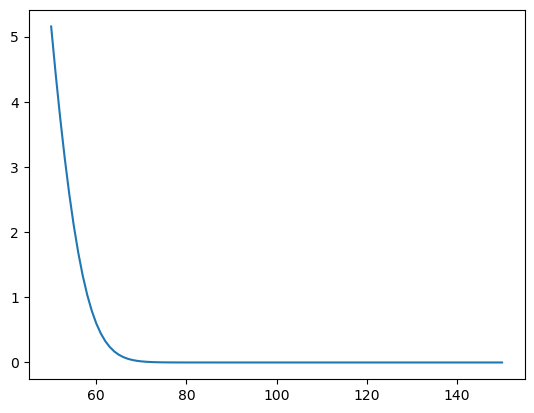

In [12]:
S0 = 50
sigma = r = 0.1
T = 1
clists = []

for k in range(50, 151):
    # iterate through value of K from 50 to 150
    C_cur = CallBS(S0=S0, K=k, r=r, sigma=sigma, T=T)
    clists.append(C_cur)

plt.plot(range(50, 151), clists)

4. Check numerically the call-put parity relation in this model for initial price S0 =
50, σ = 0.1, r = 0.1, T = 1 and K = 55.
$$
    C-P = S_t-Ke^{-r(T-t)}
$$

In [13]:
S0 = 50
sigma = r = 0.1
T = 1
K = 55

# we want to verify that put-call parity holds
c = CallBS(S0=S0, K=K, r=r, sigma=sigma, T=T, call_option=True)
p = CallBS(S0=S0, K=K, r=r, sigma=sigma, T=T, call_option=False)

LHS = c - p
RHS = S0 - K*math.e**(-r)

LHS, RHS

(0.23394200802222542, 0.23394200802222542)

Because the LHS equals to the RHS, we conclude that the put-call parity holds in this scenario.

5. The Delta of a call option at time 0 denoted by ∆ corresponds to the sensitivity
(derivative) of the Call price at time 0 with respect to the underlying asset S. Give the graph of the Delta of a Call option with strikes K = 100, r = 0, volatility sigma = 0.1 and maturity T = 1 as a function of the underlying asset S0 and interpret your results.

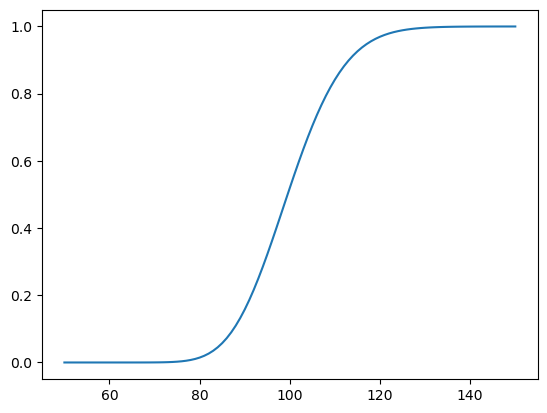

In [14]:
def delta(S0:float=100, K:float=100, r:float=0.0, sigma:float=0.1, 
         T:float=1)-> float:
    '''
    Implementation of delta. Served as the sensitivity in S0.
    @param S0: spot price for the stock
    @param K: strike price
    @param r: risk free rate
    @param sigma: volatility
    @param T: duration
    
    @return d: delta
    '''
    d1 = (np.log(S0/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d = norm.cdf(d1)
    return d

K = 100
r = 0
sigma = 0.1
T = 1
delta_list = []
for s in range(50, 151):
    # measure the value from S0=50 to S0=150
    delta_list.append(delta(S0=s, K=K, r=r, sigma=sigma, T=T))

plt.plot(range(50, 151), delta_list)

Delta measures the sensitivity of the option price to changes in the underlying asset price. As the underlying asset value increases, the Delta of the call option approaches 1. This indicates that the option price becomes more sensitive to changes in the underlying asset price, and the option behaves more like the underlying asset itself. Conversely, as the underlying asset value decreases, the Delta approaches 0. This indicates that the option price becomes less sensitive to changes in the underlying asset price.

6. (3pt) The Vega of a call option at time 0 denoted by V corresponds to the sensitivity
(derivative) of the Call price at time 0 with respect to the volatility σ.
   1. Give the graph of the Velta of a Call option with strikes K = 100, r = 0, volatility σ = 0.1 and maturity T = 1 as a function of the underlying asset S0 and propose an interpretation of your results.
   2. Show numerically that CallBS(r,  ̃σ, S0, T, K) ≈ CallBS(r, σ, S0, T, K) + V( ̃σ − σ)
for values r, σ, S0, T, K,  ̃σ of your own choice when  ̃σ ≈ σ ( ̃σ and σ close enough
but different). 

1. 

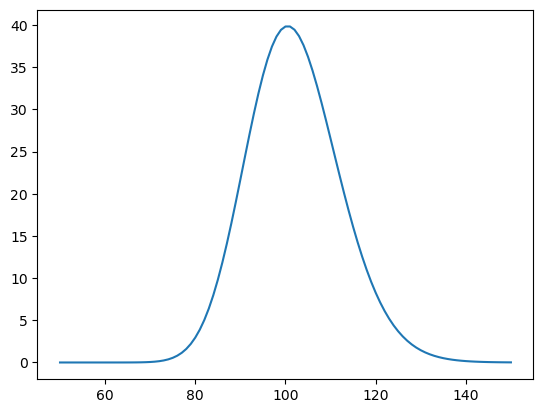

In [15]:
def vega(S0:float=100, K:float=100, r:float=0.0, sigma:float=0.1, 
         T:float=1)-> float:
    '''
    Implementation of vega. Served as the sensitivity in sigma.
    @param S0: spot price for the stock
    @param K: strike price
    @param r: risk free rate
    @param sigma: volatility
    @param T: duration
    
    @return v: vega
    '''
    d1 = (np.log(S0/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    v = S0 * norm.pdf(d1) * np.sqrt(T)
    return v

v_list = []
for s in range(50, 151):
    # measure the value from S0=50 to S0=150
    v_list.append(vega(S0=s))

plt.plot(range(50, 151), v_list)

Vega measures the sensitivity of the option price to changes in volatility. It is a bell curve that centers on when the initial price is close to 100, under the given conditions. In other words, vega, which is the sensitivity of the sigma in an option pricing method, is the highest when S0 is near 100. Conversely, it decreases in both directions S0 moves, which indicates vega is lower when S0 is farther away from 100.

2. 

In [25]:
S0 = 100
K = 100
r = sigma = 0.1
sigma_hat = 0.102
T = 1

LHS = CallBS(S0=S0, K=K, r=r, sigma=sigma_hat, T=T)
RHS = CallBS(S0=S0, K=K, r=r, sigma=sigma, T=T) + \
        vega(S0=S0, K=K, r=r, sigma=sigma, T=T) * (sigma_hat - sigma)

LHS, RHS

(10.354579876762045, 10.354127353771268)